/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


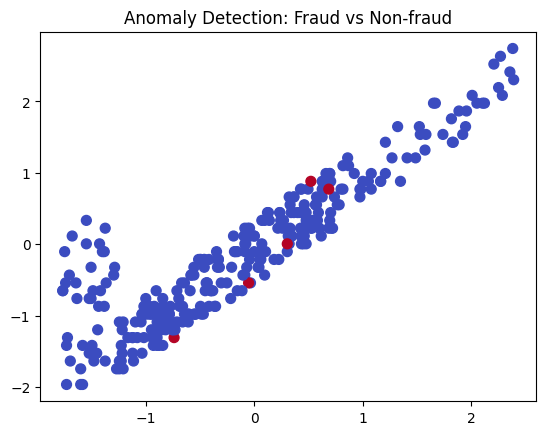

In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/insurance_claims (1).csv')

# Preprocess the data
# Drop target and non-essential columns
X = data.drop(columns=['fraud_reported', 'policy_number'])  # Assuming fraud_reported is the target
X = pd.get_dummies(X)  # One-hot encode categorical features if needed

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

# Apply Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Adjust contamination value as needed
model.fit(X_train)

# Predict anomalies
y_pred_train = model.predict(X_train)  # -1 for anomalies, 1 for normal
y_pred_test = model.predict(X_test)

# Convert predictions to 0 (fraudulent) and 1 (non-fraudulent)
y_pred_train = (y_pred_train == -1).astype(int)  # Anomalies as fraud (1)
y_pred_test = (y_pred_test == -1).astype(int)  # Anomalies as fraud (1)

# Visualize the results (optional)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='coolwarm', marker='o', s=50)
plt.title("Anomaly Detection: Fraud vs Non-fraud")
plt.show()

# If you have true labels, evaluate the model's performance
# print(classification_report(y_test, y_pred_test))


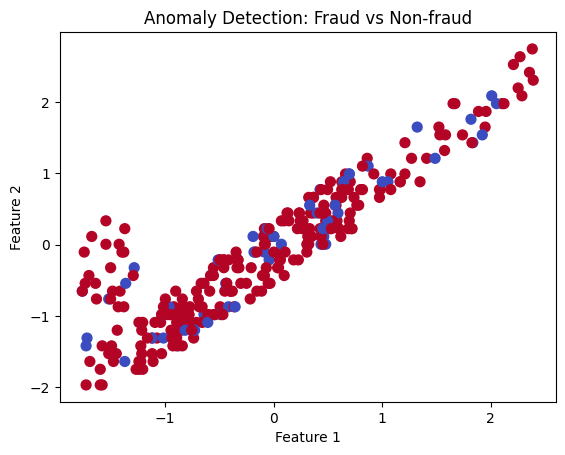

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/insurance_claims (1).csv')

# Drop the last column (assumed to be the column you want to drop)
data = data.drop(data.columns[-1], axis=1)

# Preprocess the data
X = data.drop(columns=['fraud_reported', 'policy_number'])  # Drop target column and non-essential columns (e.g., policy_number)
X = pd.get_dummies(X)  # One-hot encode categorical features if necessary

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

# Apply One-Class SVM for anomaly detection
model = OneClassSVM(kernel='rbf', nu=0.09, gamma='scale')  # Adjust nu for outlier fraction
model.fit(X_train)

# Predict anomalies
y_pred_train = model.predict(X_train)  # -1 for anomalies, 1 for normal
y_pred_test = model.predict(X_test)

# Convert predictions to 0 (fraudulent) and 1 (non-fraudulent)
y_pred_train = (y_pred_train == -1).astype(int)  # Anomalies as fraud (1)
y_pred_test = (y_pred_test == -1).astype(int)  # Anomalies as fraud (1)

# Visualize the results (optional) for the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='coolwarm', marker='o', s=50)
plt.title("Anomaly Detection: Fraud vs Non-fraud")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# If you have true labels, evaluate the model's performance
# print(classification_report(y_test, y_pred_test))  # Uncomment and use if you have true labels for evaluation


In [10]:
# Rename the target column to 'fraud_reported'
data.rename(columns={'fraud_reported_Y': 'fraud_reported'}, inplace=True)

# Check if the column has been renamed successfully
print(data.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_RAM', 'auto_model_RSX', 'auto_model_Silverado',
       'auto_model_TL', 'auto_model_Tahoe', 'auto_model_Ultima',
       'auto_model_Wrangler', 'auto_model_X5', 'auto_model_X6',
       'fraud_reported'],
      dtype='object', length=2154)


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [11]:


# Handle missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split features (X) and target (y)
X = data.drop('fraud_reported', axis=1)  # Replace 'fraud_reported' with target column
y = data['fraud_reported']

# Convert target column if necessary
y = y.replace({'Y': 1, 'N': 0})  # Replace 'Y' and 'N' with 1 and 0 if applicable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
def calculate_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")


In [16]:
# Train Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluate Logistic Regression
calculate_metrics(y_test, y_pred_lr, "Logistic Regression")


Metrics for Logistic Regression:
Accuracy: 0.76
Precision: 0.57
Recall: 0.05
F1 Score: 0.10



In [17]:
# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree
calculate_metrics(y_test, y_pred_dt, "Decision Tree")


Metrics for Decision Tree:
Accuracy: 0.81
Precision: 0.64
Recall: 0.57
F1 Score: 0.60



In [18]:
# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
y_pred_iso = iso_forest.predict(X_test)

# Map Isolation Forest outputs (-1 for anomaly, 1 for normal) to binary format
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# Evaluate Isolation Forest
calculate_metrics(y_test, y_pred_iso, "Isolation Forest")


Metrics for Isolation Forest:
Accuracy: 0.75
Precision: 0.44
Recall: 0.05
F1 Score: 0.10



In [20]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
calculate_metrics(y_test, y_pred_xgb, "XGBoost")


Metrics for XGBoost:
Accuracy: 0.80
Precision: 0.60
Recall: 0.51
F1 Score: 0.55

              precision    recall  f1-score   support

       False       0.85      0.89      0.87       226
        True       0.60      0.51      0.55        74

    accuracy                           0.80       300
   macro avg       0.73      0.70      0.71       300
weighted avg       0.79      0.80      0.79       300



In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize individual models
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=500)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('DecisionTree', dt),
        ('LogisticRegression', lr)
    ],
    voting='soft'  # Use 'soft' for probability-based voting; 'hard' for majority voting
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
def calculate_metrics(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")
    print(classification_report(y_test, y_pred))

calculate_metrics(y_test, y_pred_ensemble, "Ensemble (Decision Tree + Logistic Regression)")


Metrics for Ensemble (Decision Tree + Logistic Regression):
Accuracy: 0.81
Precision: 0.64
Recall: 0.57
F1 Score: 0.60

              precision    recall  f1-score   support

       False       0.86      0.89      0.88       226
        True       0.64      0.57      0.60        74

    accuracy                           0.81       300
   macro avg       0.75      0.73      0.74       300
weighted avg       0.81      0.81      0.81       300

